In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [3]:

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
training_set_scaled = scaler.fit_transform(training_set)

In [14]:
# creating data structure with 60 time stamp and 1 output

x_train = []
y_train = []

for i in range(60, 1258):
    x_train.append(training_set_scaled[i-60:i, 0])# i-60:i is 60 time stamp actually it is 0 to 59 and[i-60:i, 0] 0 here means is open
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)


# reshaping the vector

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [8]:
# Initializing the RNN
regressor = Sequential()


In [42]:
# first LSTM layer
tf.keras.layers.LSTM(50, return_sequences= True, input_shape = (x_train.shape[1], 1))
# Dropout layer for regularization
tf.keras.layers.Dropout(0.2)

In [29]:
# 2nd LSTM layer
tf.keras.layers.LSTM(50, return_sequences= True)
# Dropout layer for regularization
tf.keras.layers.Dropout(0.2)

In [30]:
# 3rd LSTM layer
tf.keras.layers.LSTM(50, return_sequences= True)
# Dropout layer for regularization
tf.keras.layers.Dropout(0.2)

In [32]:
# 4thLSTM layer
tf.keras.layers.LSTM(50, return_sequences= True, input_shape = (x_train.shape[1], 1))
# Dropout layer for regularization
tf.keras.layers.Dropout(0.2)

In [35]:
tf.keras.layers.Dense(1, activation = 'sigmoid')


In [43]:
# Lets compile the model

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [44]:
# Fit the RNN
regressor.fit(x_train, y_train, epochs =  50, batch_size = 32)

Epoch 1/50
38/38 [==============================] - 38s 99ms/step - loss: 0.2082 0s - lo
Epoch 2/50
38/38 [==============================] - 4s 99ms/step - loss: 0.1210
Epoch 3/50
38/38 [==============================] - 4s 98ms/step - loss: 0.1161
Epoch 4/50
38/38 [==============================] - 4s 102ms/step - loss: 0.1157
Epoch 5/50
38/38 [==============================] - 4s 102ms/step - loss: 0.1177
Epoch 6/50
38/38 [==============================] - 4s 100ms/step - loss: 0.1179
Epoch 7/50
38/38 [==============================] - 4s 104ms/step - loss: 0.1164
Epoch 8/50
38/38 [==============================] - 4s 103ms/step - loss: 0.1140
Epoch 9/50
38/38 [==============================] - 4s 99ms/step - loss: 0.1163
Epoch 10/50
38/38 [==============================] - 4s 99ms/step - loss: 0.1155
Epoch 11/50
38/38 [==============================] - 4s 100ms/step - loss: 0.1111
Epoch 12/50
38/38 [==============================] - 4s 98ms/step - loss: 0.1176
Epoch 13/50
38/38 [===

In [52]:
# Load the stock price test data of 2017

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [53]:
# Get the predicted stock price of 2017 and visualIZING THE RESULTS
 
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs= dataset_total[len(dataset_total)- len(dataset_test)- 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

x_test = []

for i in range(60, 80):
    x_test.append(inputs[i- 60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0] , x_test.shape[1], 1))

predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

<function matplotlib.pyplot.show(close=None, block=None)>

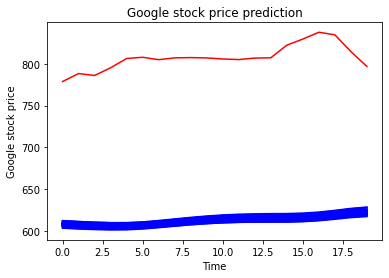

In [59]:
# visualize the results of predicted and real stock prices

plt.plot(real_stock_price, color = 'red', label = 'Real google stock price' )
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted google stock price' )
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.show
# plt.legend()
